In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

x_train = x_train.reshape(-1,28*28).astype('float32') / 255
x_test = x_test.reshape(-1,28*28).astype('float32') / 255
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000,) (10000, 784) (10000,)


In [35]:
#카테고리 데이터로 변환
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [39]:
model=Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(10, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('./data/model/new/best.hdf5', monitor='val_loss', verbose=0, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(x_train, y_train, epochs=100, batch_size=500,callbacks=[model_checkpoint,earlyStopping],validation_split=0.25)


Epoch 1/100
90/90 [==============================] - 3s 18ms/step - loss: 0.4805 - accuracy: 0.8688 - val_loss: 0.2388 - val_accuracy: 0.9322
Epoch 2/100
90/90 [==============================] - 1s 14ms/step - loss: 0.2048 - accuracy: 0.9415 - val_loss: 0.1813 - val_accuracy: 0.9489
Epoch 3/100
90/90 [==============================] - 1s 14ms/step - loss: 0.1460 - accuracy: 0.9589 - val_loss: 0.1446 - val_accuracy: 0.9591
Epoch 4/100
90/90 [==============================] - 1s 14ms/step - loss: 0.1115 - accuracy: 0.9697 - val_loss: 0.1261 - val_accuracy: 0.9633
Epoch 5/100
90/90 [==============================] - 1s 15ms/step - loss: 0.0891 - accuracy: 0.9754 - val_loss: 0.1128 - val_accuracy: 0.9663
Epoch 6/100
90/90 [==============================] - 1s 13ms/step - loss: 0.0716 - accuracy: 0.9811 - val_loss: 0.1043 - val_accuracy: 0.9691
Epoch 7/100
90/90 [==============================] - 1s 13ms/step - loss: 0.0594 - accuracy: 0.9842 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 

In [40]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test loss: {loss:.2f}")
print(f"Test accuracy: {accuracy:.2f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9798
Test loss: 0.07
Test accuracy: 0.98


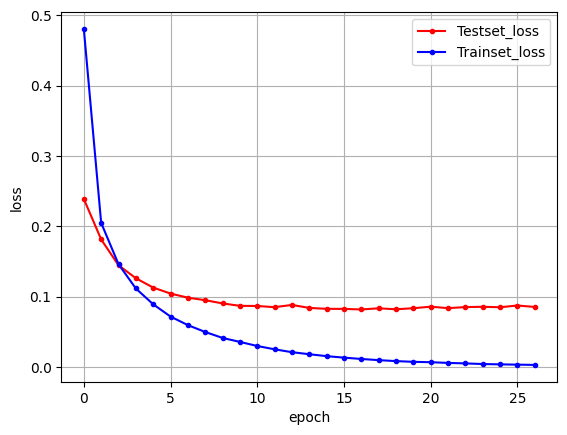

In [43]:

y_vloss =history.history['val_loss']
y_loss =history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [87]:
import cv2
import numpy as np
from PIL import Image

# 이미지 열기
im = Image.open('../다운로드한 이미지파일 활용/test.jpg')

# 이미지 크기 출력
print(im.size)

# 이미지를 numpy 배열로 변환
im_array = np.array(im)

# 컬러 이미지를 그레이스케일 이미지로 변환
im_gray = cv2.cvtColor(im_array, cv2.COLOR_BGR2GRAY)

# 이미지 크기 조정
im_gray = cv2.resize(im_gray, (28, 28))

# 이미지를 numpy 배열로 변환
img_array = np.array(im_gray)
img_array.shape

(321, 322)


(28, 28)

In [92]:
# 이미지를 1차원 배열로 변환
img_array = img_array.reshape(1, 784)

# 모델 평가
loss, accuracy = model.evaluate(img_array, verbose=1)

# 결과 출력
print('Loss:', loss)
print('Accuracy:', accuracy)

1/1 [==============================] - 0s 110ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Loss: 0.0
Accuracy: 0.0
